# Ramesh Gopinath Sequential NLP AIML Project

## Part A - Digital content and Entertainment Industry - Sentiment Analysis

this is a many to one kind of NLP problem

###1. Import and analyse the data set

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
glove_path = "/content/drive/MyDrive/Colab Notebooks/Project/NLP-2/"

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd

In [ ]:
#num_words would be equal to top 10000 words

top_words = 10000
(AX_train, Ay_train), (AX_test, Ay_test) = tf.keras.datasets.imdb.load_data(path="imdb.npz",num_words=top_words)

In [ ]:
print(AX_train.shape)
print(Ay_train.shape)
print("")
print(AX_test.shape)
print(Ay_test.shape)

(25000,)
(25000,)

(25000,)
(25000,)


In [ ]:
print(AX_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
print(Ay_train)

[1 0 0 ... 0 1 0]


In [ ]:
print ("length =",len(AX_train[0]))

length = 218


In [ ]:
print( "max word index is",max(AX_train[0]))

max word index is 7486


###2. Perform relevant sequence adding on the data.

In [ ]:
def max_len(input):

  max_length = 0
  max_word_idx = 0
  max_len_count = []
  max_word_count = []

  for i in range(25000-1):
    length = len(input[i])
    max_idx = max(input[i])
    if (length > max_length):
      max_length = length
      max_len_count.append(max_length)
      print("max_length so far",max_length)
    if (max_idx > max_word_idx):
      max_word_idx = max_idx
      max_word_count.append(max_word_idx)
      print("max word index so far",max_word_idx)
      
  return(max_length, max_word_idx, max_len_count, max_word_count)      

In [ ]:
max_len(AX_train)

max_length so far 218
max word index so far 7486
max word index so far 9837
max_length so far 550
max word index so far 9941
max_length so far 562
max_length so far 752
max_length so far 888
max word index so far 9978
max_length so far 975
max_length so far 1038
max word index so far 9995
max word index so far 9996
max word index so far 9997
max word index so far 9999
max_length so far 1629
max_length so far 1851
max_length so far 1854
max_length so far 2494


(2494,
 9999,
 [218, 550, 562, 752, 888, 975, 1038, 1629, 1851, 1854, 2494],
 [7486, 9837, 9941, 9978, 9995, 9996, 9997, 9999])

In [ ]:
train_max_len, train_max_word, train_max_len_knt, train_max_word_knt = max_len(AX_train)

max_length so far 218
max word index so far 7486
max word index so far 9837
max_length so far 550
max word index so far 9941
max_length so far 562
max_length so far 752
max_length so far 888
max word index so far 9978
max_length so far 975
max_length so far 1038
max word index so far 9995
max word index so far 9996
max word index so far 9997
max word index so far 9999
max_length so far 1629
max_length so far 1851
max_length so far 1854
max_length so far 2494


In [ ]:
print("train_max_len",train_max_len)
print("train_max_word",train_max_word)
print("train_max_len_knt",train_max_len_knt)
print("train_max_word_knt",train_max_word_knt)

train_max_len 2494
train_max_word 9999
train_max_len_knt [218, 550, 562, 752, 888, 975, 1038, 1629, 1851, 1854, 2494]
train_max_word_knt [7486, 9837, 9941, 9978, 9995, 9996, 9997, 9999]


In [ ]:
def tot_count(arr):

  knt_250 = 0
  knt_500 = 0
  knt_750 = 0
  knt_1000 = 0
  knt_1250 = 0
  knt_1500 = 0
  knt_1750 = 0
  knt_2000 = 0
  knt_2250 = 0
  knt_2500 = 0

  for i in range(0,len(arr)):
    length = len(arr[i])
    #print("length",length)
    if (length >= 0 ) and (length <= 250):
      knt_250 = knt_250 + 1
    elif (length >= 251 ) and (length <= 500):
      knt_500 = knt_500 + 1
    elif (length >= 501 ) and (length <= 750):
      knt_750 = knt_750 + 1
    elif (length >= 751 ) and (length <= 1000):
      knt_1000 = knt_1000 + 1
    elif (length >= 1001 ) and (length <= 1250):
      knt_1250 = knt_1250 + 1
    elif (length >= 1251 ) and (length <= 1500):
      knt_1500 = knt_1500 + 1
    elif (length >= 1501 ) and (length <= 1750):
      knt_1750 = knt_1750 + 1
    elif (length >= 1751 ) and (length <= 2000):
      knt_2000 = knt_2000 + 1
    elif (length >= 2001 ) and (length <= 2250):
      knt_2250 = knt_2250 + 1
    elif (length >= 2251 ) and (length <= 2500):
      knt_2500 = knt_2500 + 1
  
  return(knt_250, knt_500, knt_750, knt_1000, knt_1250, knt_1500, knt_1750, knt_2000, knt_2250, knt_2500)  


In [ ]:
tr_250, tr_500, tr_750, tr_1000, tr_1250, tr_1500, tr_1750, tr_2000, tr_2250, tr_2500 = tot_count(AX_train)

In [ ]:
print("AX_train word length frequences")

print("")
print("between 0 & 250...:",tr_250)
print("between 251 & 500...:",tr_500)
print("between 501 & 750...:",tr_750)
print("between 751 & 1000...:",tr_1000)
print("between 1001 & 1250...:",tr_1250)
print("between 1251 & 1500...:",tr_1500)
print("between 1501 & 1750...:",tr_1750)
print("between 1751 & 2000...:",tr_2000)
print("between 2001 & 2250...:",tr_2250)
print("between 2251 & 2500...:",tr_2500)
print("")

print("AX train total",tr_250 + tr_500 + tr_750 + tr_1000 + tr_1250 + tr_1500 + tr_1750 + tr_2000 + tr_2250 + tr_2500)

AX_train word length frequences

between 0 & 250...: 17172
between 251 & 500...: 5720
between 501 & 750...: 1466
between 751 & 1000...: 523
between 1001 & 1250...: 104
between 1251 & 1500...: 7
between 1501 & 1750...: 5
between 1751 & 2000...: 2
between 2001 & 2250...: 0
between 2251 & 2500...: 1

AX train total 25000


The max length of words in AX_train is 2494 and max word index is 9999.

A huge number of sentences with word counts are between 0 & 250, next is between 251 & 500.  Beyond 1250 there are very few sentences with word counts..

So it is better to choose the 1250 as the maxlen in pad_sequences() function and since the max word index is 9999, i am choosing the value for padding as 10001

In [ ]:
MAX_SEQUENCE_LENGTH = 1250
MAX_PADDING = 10001

AX_train_1 = pad_sequences(AX_train, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', truncating='pre', value=MAX_PADDING)

Now all the reviews in the Training set has been set to a uniform length of 1250 with pre-padding value of 10001

In [ ]:
max_len(AX_test)

max_length so far 68
max word index so far 7944
max_length so far 260
max word index so far 8463
max_length so far 603
max word index so far 9909
max_length so far 761
max word index so far 9985
max word index so far 9996
max_length so far 787
max_length so far 867
max_length so far 1000
max_length so far 1013
max_length so far 1052
max word index so far 9998
max word index so far 9999
max_length so far 1061
max_length so far 1093
max_length so far 1162
max_length so far 2110
max_length so far 2119
max_length so far 2315


(2315,
 9999,
 [68,
  260,
  603,
  761,
  787,
  867,
  1000,
  1013,
  1052,
  1061,
  1093,
  1162,
  2110,
  2119,
  2315],
 [7944, 8463, 9909, 9985, 9996, 9998, 9999])

The max length of words in AX_test is 2315 and max word index is 9999

In [ ]:
test_max_len, test_max_word, test_max_len_knt, test_max_word_knt = max_len(AX_test)

max_length so far 68
max word index so far 7944
max_length so far 260
max word index so far 8463
max_length so far 603
max word index so far 9909
max_length so far 761
max word index so far 9985
max word index so far 9996
max_length so far 787
max_length so far 867
max_length so far 1000
max_length so far 1013
max_length so far 1052
max word index so far 9998
max word index so far 9999
max_length so far 1061
max_length so far 1093
max_length so far 1162
max_length so far 2110
max_length so far 2119
max_length so far 2315


In [ ]:
print("test_max_len",test_max_len)
print("test_max_word",test_max_word)
print("test_max_len_knt",test_max_len_knt)
print("test_max_word_knt",test_max_word_knt)

test_max_len 2315
test_max_word 9999
test_max_len_knt [68, 260, 603, 761, 787, 867, 1000, 1013, 1052, 1061, 1093, 1162, 2110, 2119, 2315]
test_max_word_knt [7944, 8463, 9909, 9985, 9996, 9998, 9999]


In [ ]:
ts_250, ts_500, ts_750, ts_1000, ts_1250, ts_1500, ts_1750, ts_2000, ts_2250, ts_2500 = tot_count(AX_test)

In [ ]:
print("AX_test word length frequences")
print("")

print("between 0 & 250...:",ts_250)
print("between 251 & 500...:",ts_500)
print("between 501 & 750...:",ts_750)
print("between 751 & 1000...:",ts_1000)
print("between 1001 & 1250...:",ts_1250)
print("between 1251 & 1500...:",ts_1500)
print("between 1501 & 1750...:",ts_1750)
print("between 1751 & 2000...:",ts_2000)
print("between 2001 & 2250...:",ts_2250)
print("between 2251 & 2500...:",ts_2500)

print("")

print("AX test total",ts_250 + ts_500 + ts_750 + ts_1000 + ts_1250 + ts_1500 + ts_1750 + ts_2000 + ts_2250 + ts_2500)

AX_test word length frequences

between 0 & 250...: 17642
between 251 & 500...: 5433
between 501 & 750...: 1368
between 751 & 1000...: 505
between 1001 & 1250...: 47
between 1251 & 1500...: 1
between 1501 & 1750...: 1
between 1751 & 2000...: 0
between 2001 & 2250...: 2
between 2251 & 2500...: 1

AX test total 25000


The max length of words in AX_test (testing set) is 2315 and max word index is 9999

Again as in training set most of the movie reviews are smaller ones with word length between 0 & 250, next frequency is between 251 - 500 and so on till 1001 - 1250.  After all the lengthier review counts are very less in number.

So we can use 1250 as the maxlen in the padding_sequence() and again as in training set 9999 is the max word index so i am again choosing 10001 as the value for padding

In [ ]:
MAX_SEQUENCE_LENGTH = 1250
MAX_PADDING = 10001

AX_test_1 = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', truncating='pre', value=MAX_PADDING)

Now all the reviews in the testing set are uniform with 1250 word counts with 10001 pre-padded

###3. Perform following data analysis:

####Print shape of features and labels


#####Training set features and labels

In [ ]:
len(AX_train_1[5786])

1250

In [ ]:
print('Shape of training data tensor:', AX_train_1.shape)

Shape of training data tensor: (25000, 1250)


In [ ]:
Ay_train_1 = Ay_train
print('Shape of training label tensor:', Ay_train_1.shape)

Shape of training label tensor: (25000,)


In [ ]:
len(AX_test_1[7689])

1250

#####Testing set features and labels

In [ ]:
print('Shape of testing data tensor:', AX_test_1.shape)

Shape of testing data tensor: (25000, 1250)


In [ ]:
Ay_test_1 = Ay_test
print('Shape of testing label tensor:', Ay_test_1.shape)

Shape of testing label tensor: (25000,)


In [ ]:
print("AX_train_1 shape",AX_train_1.shape)
print("Ay_train_1 shape",Ay_train_1.shape)
print("")
print("AX_test_1 shape",AX_test_1.shape)
print("Ay_test_1 shape",Ay_test_1.shape)


AX_train_1 shape (25000, 1250)
Ay_train_1 shape (25000,)

AX_test_1 shape (25000, 1250)
Ay_test_1 shape (25000,)


#####Print any one value of feature and its label

In [ ]:
import random
 
# Generates a random number between
# a given positive range
r1 = random.randint(0, 25000)
print("Random number between 0 and 10 is % s" % (r1))

Random number between 0 and 10 is 4702


In [ ]:
print("AX_train_1 with the random number",AX_train_1[r1])
print("Ay_train_1 with the random number",Ay_train_1[r1])
print("")

print("AX_test_1 with the random number",AX_test_1[r1])
print("Ay_test_1 with the random number",Ay_test_1[r1])


AX_train_1 with the random number [10001 10001 10001 ...   900    92  1414]
Ay_train_1 with the random number 1

AX_test_1 with the random number [10001 10001 10001 ...  7605    45   253]
Ay_test_1 with the random number 0


####4. Decode the feature value to get original sentence

In [ ]:
word_to_id = keras.datasets.imdb.get_word_index()

INDEX_FROM = 3

word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}


1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
print(' '.join(id_to_word[id] for id in AX_train[r1] ))

<START> okay this has been a favourite since i was 14 granted i don't watch it multiple times a year anymore but this is not a movie for an older generation who want a deeper meaning or some brilliant message this movie is fun it's pretty dated almost <UNK> but parker posey is so brilliant that it's unbelievable if you want to be <UNK> by a 90's breakfast at <UNK> attended 90's <UNK> or love parker this movie is for you otherwise don't bother


In [ ]:
index_word = {v : k for k,v in word_to_id.items()} # get {index : word}

print(" ".join([index_word[idx] for idx in AX_train[r1]]))
print("positve" if Ay_train[r1]==1 else "negetive")

<START> okay this has been a favourite since i was 14 granted i don't watch it multiple times a year anymore but this is not a movie for an older generation who want a deeper meaning or some brilliant message this movie is fun it's pretty dated almost <UNK> but parker posey is so brilliant that it's unbelievable if you want to be <UNK> by a 90's breakfast at <UNK> attended 90's <UNK> or love parker this movie is for you otherwise don't bother
positve


In [ ]:
for i in range(1,6):
  
  rand_revision = random.randint(0, 25000)
  print("Sample number...:",i)
  print("")
  print("   rand revision",rand_revision)
  print("")
  print(" ".join([index_word[idx] for idx in AX_train[rand_revision]]))
  print("   Positve" if Ay_train[rand_revision]==1 else "    Negetive")
  print("")

Sample number...: 1

   rand revision 11088

<START> problem child is one of the worst movies i have seen in the last decade this is a bad movie about a savage boy adopted by two parents but he gets into trouble later that junior can drive <UNK> car he can scare people with a bear he can put a room on fire it is a bad movie as much as battlefield earth a sequel is an even worse fate rent chicken run instead br br 1 2 out of i give it
    Negetive

Sample number...: 2

   rand revision 16026

<START> this movie certainly proves that also the good americans can do terribly good propaganda no questions being asked no comments being made on power abuse or police terror when james stewart solid and convincing as always <UNK> all the stories from dillinger to <UNK> <UNK> more or less <UNK> june <UNK> as his regular love interest holds up the family values and e j hoover is executive producer and children or non guilty <UNK> are never <UNK> when the professionals <UNK> not to speak of civil r

Decoding all the 25000 X_train reviews

In [ ]:
def decode_imdb_reviews(text_data):
    result = [0 for x in range(len(text_data))]
    word_index = keras.datasets.imdb.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    for review in range(0,len(text_data)):
        for index in enumerate(text_data[review]):
            decoded_review = ' '.join([reverse_word_index.get(index - 3, '#') for index in text_data[review]])
        result[review] = decoded_review
    return result


In [ ]:
text_data = []
text_data = decode_imdb_reviews(AX_train)

In [ ]:
train_data = text_data.copy()

In [ ]:
train_data[14031]

"# my roommate had bought this documentary and invited me to watch it with her she's from china and only heard so much about 9 11 and wanted to know the cold hard truth and she wanted me to tell her more after the documentary i felt awful watching this documentary it was like # the nightmare and it still brings tears to my eyes br br but i'm extremely grateful that i watched this documentary because on the day of september # i'm sure we all remember where we were and what we were doing when we heard all of us could only think certain questions why how what's going on oh my god almost all the americans were grateful for the brave # and policemen that # their lives to save others but i don't think we thought about what they were really going though this wasn't actually supposed to be a documentary about 9 11 the cameraman was just filming a typical day on the job and they just happened to be a couple # away from the world trade centers and got everything outside and in on tape br br on #

In [ ]:
Ay_train[14031]

1

In [ ]:
train_data[22175]

"# well not yet at least br br it's not listed in the worst 100 br br so let's all team up and put it in it's # place br br this is truly a bad movie and i liked #"

In [ ]:
Ay_train[22175]

0

In [ ]:
train_data[12576]

"# my former # contemporary simon # today a writer and journalist has put forward the theory that just as british film makers in the eighties were often critical of what they called # britain the ealing comedies were intended as # on # britain the britain which had come into being after the # victory in the 1945 general election this theory was presumably not intended to apply to say kind hearts and # which is if anything a satire on the # upper classes or to the # or the # hill mob both of which may contain some satire but are not political in nature it can however be applied to most of the other films in the series especially # to # br br # is or at least was in the forties a # working class district of london set on the north bank of the # about a mile from victoria station it is not quite correct to say as has often been said that the film is about # # itself independent of britain what happens is that an ancient # comes to light proving that in the # century the area was # by king

In [ ]:
Ay_train[12576]

1

In [ ]:
train_data[917]

"# personally i think this show looks pretty cheaply made some of the actors are terrible they over do it seem fake i can always tell how it's going to end within the first 10 minutes or less of watching because they make it so # clear it's not very well written either i love to watch it to laugh at it you know the saying it's so bad that it's good well that saying applies to this show i also like to watch just to see if i'm right when i guess how it's all going to end so far i've been right every time it's like a little game that i play it's nice when you are bored you feel like laughing at something"

In [ ]:
Ay_train[917]

0

In [ ]:
train_data[22695]

"# i haven't seen anything this bad since i walked out of the james bond movie # twenty years ago i managed to sit through the entirety of this one only because of # # but there was nothing she could do to save this beast br br as a cross between # orlando and # this movie failed miserably in every aspect of # the characters were cardboard and unable to evoke any kind of sympathy the plot was wholly unbelievable the acting was with the exception of # amateur the computer graphics were worse than in # timothy # was extremely annoying i could go on but what's the point br br the only good thing i can say about this film is that # # was in it i have no idea why an actress of her caliber # to appear in such a dud but she most likely regrets it now br br don't waste your money or your time on this stinker there's nothing worth seeing here"

In [ ]:
Ay_train[22695]

0

Decoding all the 25000 Testing reviews

In [ ]:
test_data = []
test_data = decode_imdb_reviews(AX_test)

In [ ]:
test_data[200]

"# don't be fooled this isn't yet another tired example of the girls from outer space pretending to be the french # team come to earth to collect as much # as possible genre though the synopsis may suggest otherwise this movie is a gem an absolute jewel that has # my life from the moment i laid eyes upon it hilarious # action packed and stunningly erotic # is a euro # tour de force a grossly underrated # classic br br stop everything you are doing and run out to rent or better yet buy this movie immediately"

In [ ]:
Ay_test[200]

1

In [ ]:
test_data[300]

"# nurse charlotte # the lovely # has arrived to dr clinic for the insane prepared for a new job what she doesn't expect is to find another supposed doctor in his position after # is attacked by axe wielding # judge oliver w cameron in a running gag anytime he confronts a situation out of his control he # to repeating his name that doctor is # masters # who isn't sure about whether # is a proper fit for their establishment after a long discussion about the position which is quite an awkward scene as the two debate about being sent a letter by # getting a job at the clinic with masters often reminding her that he is no longer in charge masters agrees to let her work in the # position but the good doctor may not be who she seems br br the assortment of # includes sam bill # a simple minded child man who was last victim of # jennifer warren a woman who needs an adult to comfort her as she # at # # like a puppy danny jessie # a trouble making annoyance often trying to steal the fake baby o

In [ ]:
Ay_test[300]

1

In [ ]:
test_data[400]

"# file this one in the how do movies like this get made ' # a seventies drag indie version of # ' adapted fairly # but # in a # unconventional black comic style the cast gives it a shot with christopher walken # in the # as and with # tierney rising above the dull script as pat the other actors are wasted as is the audience's time # jerk fans of this brand of # may like it though 4 out of 10"

In [ ]:
Ay_test[400]

0

Both the Training and Testing data have been decoded and they can now be used with any Supervised Learning Models like 

- Logistic regression
- Support Vector classifier
- KNN classifier
- XGBoost classifier
- CATBoost classifier
- Random Forest classifier
- ANN model etc.

####5. Design, train, tune and test a sequential model.

In [ ]:
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
print("AX_train_1 shape",AX_train_1.shape)
print("Ay_train_1 shape",Ay_train_1.shape)
print("")
print("AX_test_1 shape",AX_test_1.shape)
print("Ay_test_1 shape",Ay_test_1.shape)

AX_train_1 shape (25000, 1250)
Ay_train_1 shape (25000,)

AX_test_1 shape (25000, 1250)
Ay_test_1 shape (25000,)


In [ ]:
MAX_NB_WORDS = 10002
EMBEDDING_DIM = 100

In [ ]:
model_A1 = Sequential()
model_A1.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=AX_train_1.shape[1]))
model_A1.add(LSTM(128))
model_A1.add(Dense(1, activation='sigmoid'))

print(model_A1.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 1250, 100)         1000200   
                                                                 
 lstm_29 (LSTM)              (None, 128)               117248    
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,117,577
Trainable params: 1,117,577
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
opt_adam_A = keras.optimizers.Adam(learning_rate = 0.001)
model_A1.compile(loss='binary_crossentropy', optimizer=opt_adam_A, metrics=['accuracy'])

In [ ]:
epochs = 6
batch_size = 400

history_A1 = model.fit(AX_train_1, Ay_train_1, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/6
57/57 [==============================] - 434s 8s/step - loss: 0.3437 - accuracy: 0.8796 - val_loss: 0.3727 - val_accuracy: 0.8532
Epoch 2/6
57/57 [==============================] - 492s 9s/step - loss: 0.3089 - accuracy: 0.8938 - val_loss: 0.3442 - val_accuracy: 0.8652
Epoch 3/6
57/57 [==============================] - 432s 8s/step - loss: 0.2788 - accuracy: 0.9064 - val_loss: 0.3249 - val_accuracy: 0.8744
Epoch 4/6
57/57 [==============================] - 430s 8s/step - loss: 0.2548 - accuracy: 0.9162 - val_loss: 0.3128 - val_accuracy: 0.8792
Epoch 5/6
57/57 [==============================] - 432s 8s/step - loss: 0.2356 - accuracy: 0.9240 - val_loss: 0.3119 - val_accuracy: 0.8800
Epoch 6/6
57/57 [==============================] - 433s 8s/step - loss: 0.2211 - accuracy: 0.9285 - val_loss: 0.3066 - val_accuracy: 0.8792


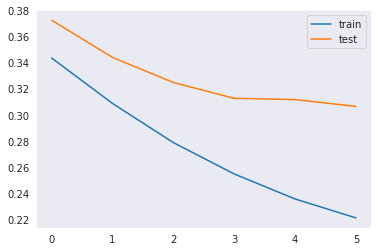

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history_A1.history['loss'], label='train')
plt.plot(history_A1.history['val_loss'], label='test')
plt.legend()
plt.show()

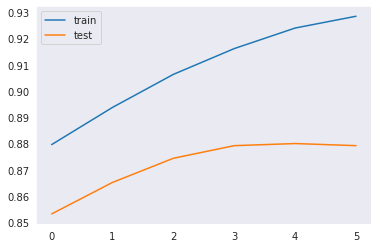

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history_A1.history['accuracy'], label='train')
plt.plot(history_A1.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
model_A1.evaluate(AX_test_1,Ay_test_1)

782/782 [==============================] - 296s 377ms/step - loss: 0.6934 - accuracy: 0.4880


[0.6933521628379822, 0.48796001076698303]

###6. Use the designed model to print the prediction on any one sample

In [ ]:
y_pred_A1 = model.predict(AX_test_1)

In [ ]:
for i in range(1,6):
  
  rand_test = random.randint(0, 25000)
  print("random test sample...:",i)
  print("")
  print("   random test number",rand_test)
  print("")
  print("   AX_test_1",AX_test_1[rand_test])
  print("   Ay_test_1",Ay_test_1[rand_test])
  print("   Ay_pred_1",y_pred_A1[rand_test])
  print("")

random test sample...: 1

   random test number 1661

   AX_test_1 [10001 10001 10001 ...   290  2987    46]
   Ay_test_1 1
   Ay_pred_1 [0.9142689]

random test sample...: 2

   random test number 4214

   AX_test_1 [10001 10001 10001 ...    36  2895    90]
   Ay_test_1 0
   Ay_pred_1 [0.04903972]

random test sample...: 3

   random test number 4748

   AX_test_1 [10001 10001 10001 ...    38  1543  1168]
   Ay_test_1 1
   Ay_pred_1 [0.88371336]

random test sample...: 4

   random test number 2172

   AX_test_1 [10001 10001 10001 ...    93    12  1307]
   Ay_test_1 1
   Ay_pred_1 [0.9636537]

random test sample...: 5

   random test number 18891

   AX_test_1 [10001 10001 10001 ...    19     6  4216]
   Ay_test_1 0
   Ay_pred_1 [0.05734265]



### Designing training, testing a Bi-directional LSTM model.

In [ ]:
MAX_NB_WORDS = 10002
EMBEDDING_DIM = 100

inputs_A1 = keras.Input(shape=(None,), dtype="int32")
Ax = layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=AX_train_1.shape[1])(inputs_A1)
# Add 2 bidirectional LSTMs
Ax = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(Ax)
Ax = layers.Bidirectional(layers.LSTM(32))(Ax)
# Add a classifier
outputs_A1 = layers.Dense(1, activation="sigmoid")(Ax)
model_A2 = keras.Model(inputs_A1, outputs_A1)

model_A2.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_19 (Embedding)    (None, None, 100)         1000200   
                                                                 
 bidirectional_22 (Bidirecti  (None, None, 128)        84480     
 onal)                                                           
                                                                 
 bidirectional_23 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,125,961
Trainable params: 1,125,961
Non-tr

In [ ]:
opt_adam_A2 = keras.optimizers.Adam(learning_rate = 0.001)
model_A2.compile(loss='binary_crossentropy', optimizer=opt_adam_A2, metrics=['accuracy'])

In [ ]:
epochs = 6
batch_size = 400

history_A2 = model_A2.fit(AX_train_1, Ay_train_1, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=2, min_delta=0.0001)])

Epoch 1/6
57/57 [==============================] - 1239s 21s/step - loss: 0.5303 - accuracy: 0.7225 - val_loss: 0.3909 - val_accuracy: 0.8468
Epoch 2/6
57/57 [==============================] - 1095s 19s/step - loss: 0.2455 - accuracy: 0.9074 - val_loss: 0.3028 - val_accuracy: 0.8812
Epoch 3/6
57/57 [==============================] - 1078s 19s/step - loss: 0.1787 - accuracy: 0.9380 - val_loss: 0.3065 - val_accuracy: 0.8852
Epoch 4/6
57/57 [==============================] - 1064s 19s/step - loss: 0.1194 - accuracy: 0.9619 - val_loss: 0.3532 - val_accuracy: 0.8784


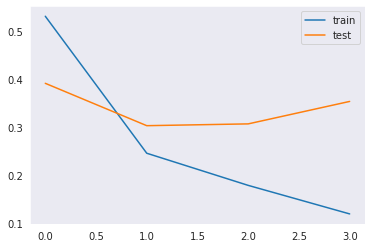

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history_A2.history['loss'], label='train')
plt.plot(history_A2.history['val_loss'], label='test')
plt.legend()
plt.show()

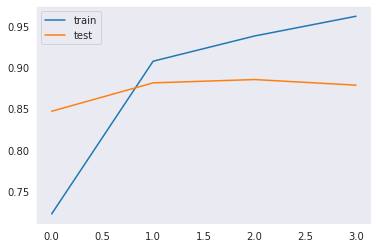

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history_A2.history['accuracy'], label='train')
plt.plot(history_A2.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Pickling both the Models.....  LSTM model as well as Bi-directional LSTM model

In [ ]:
import pickle

pickle_path = "/content/drive/MyDrive/Colab Notebooks/Project/NLP-2/"

pickle_file_2 = pickle_path+'LSTM_model_A2.pkl'
pickle.dump(model_A2, open(pickle_file_2, 'wb'))

In [ ]:
pickle_file_1 = pickle_path+'LSTM_model_A1.pkl'
pickle.dump(model_A1, open(pickle_file_1, 'wb'))

Evaluating test data with Bi-directional LSTM model

In [ ]:
model_A2.evaluate(AX_test_1,Ay_test_1)

782/782 [==============================] - 449s 574ms/step - loss: 0.3702 - accuracy: 0.8681


[0.3702309727668762, 0.8680800199508667]

In [ ]:
y_pred_A2 = model_A2.predict(AX_test_1)

In [ ]:
for prev_i in (17409,16507,2495,1816,20193):
  
  print("From the ealier random test sample...:",prev_i)
  print("")
  print("   AX_test_1 :",AX_test_1[prev_i])
  print("   Ay_test_1 :",Ay_test_1[prev_i])
  print("")
  print("   y_pred_A1 :",y_pred_A1[prev_i])
  print("   y_pred_A2 :",y_pred_A2[prev_i])
  print("")

From the ealier random test sample...: 17409

   AX_test_1 : [10001 10001 10001 ...    11   345   420]
   Ay_test_1 : 0

   y_pred_A1 : [0.04251519]
   y_pred_A2 : [0.0106363]

From the ealier random test sample...: 16507

   AX_test_1 : [10001 10001 10001 ...     6    22   707]
   Ay_test_1 : 0

   y_pred_A1 : [0.04297066]
   y_pred_A2 : [0.01010761]

From the ealier random test sample...: 2495

   AX_test_1 : [10001 10001 10001 ...    10   693   158]
   Ay_test_1 : 1

   y_pred_A1 : [0.96932894]
   y_pred_A2 : [0.9940331]

From the ealier random test sample...: 1816

   AX_test_1 : [10001 10001 10001 ...    15  1699  2666]
   Ay_test_1 : 1

   y_pred_A1 : [0.76476175]
   y_pred_A2 : [0.9049176]

From the ealier random test sample...: 20193

   AX_test_1 : [10001 10001 10001 ...    52    17  3973]
   Ay_test_1 : 1

   y_pred_A1 : [0.11687392]
   y_pred_A2 : [0.27671903]



###Predictions of LSTM model

random test number 1661

   - Ay_test_1 1
   - **Ay_pred_1 [0.9142689]**

random test number 4214

   - Ay_test_1 0
   - **Ay_pred_1 [0.04903972]**

random test number 4748

   - Ay_test_1 1
   - **Ay_pred_1 [0.88371336]**

random test number 2172

   - Ay_test_1 1
   - **Ay_pred_1 [0.9636537]**

random test number 18891

   - Ay_test_1 0
   - **Ay_pred_1 [0.05734265]**

###Comparison between LSTM model and Bi-directional LSTM model

From the ealier random test sample...: 17409

   Actual data : 0 

   - **LSTM  : [0.04251519]**
   - **Bi-directional : [0.0106363]**

From the ealier random test sample...: 16507

   Actual data : 0 

   - **LSTM : [0.04297066]**
   - **Bi-directional : [0.01010761]**

From the ealier random test sample...: 2495

   Actual data : 1

   - **LSTM : [0.96932894]**
   - **Bi-directional : [0.9940331]**

From the ealier random test sample...: 1816

   Actual data : 1 

   - **LSTM : [0.76476175]**
   - **Bi-directional : [0.9049176]**

From the ealier random test sample...: 20193

   Actual data : 1

   - **LSTM : [0.11687392]** 
   - **Bi-directional : [0.27671903]**


# Part B - Social Media Analytics

###1. Read and explore the data 

In [2]:
glove_path = "/content/drive/MyDrive/Colab Notebooks/Project/NLP-2/"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import json

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow import keras

In [4]:
def parseJson(fname):
    for line in open(fname, 'r'):
        yield eval(line)

In [5]:
tweet_data = list(parseJson(glove_path+'Sarcasm_Headlines_Dataset.json'))

In [ ]:
tweet_data

[{'is_sarcastic': 1,
  'headline': 'thirtysomething scientists unveil doomsday clock of hair loss',
  'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205'},
 {'is_sarcastic': 0,
  'headline': 'dem rep. totally nails why congress is falling short on gender, racial equality',
  'article_link': 'https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207'},
 {'is_sarcastic': 0,
  'headline': 'eat your veggies: 9 deliciously different recipes',
  'article_link': 'https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html'},
 {'is_sarcastic': 1,
  'headline': 'inclement weather prevents liar from getting to work',
  'article_link': 'https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031'},
 {'is_sarcastic': 1,
  'headline': "mother comes pretty close to using word 'streaming' correctly",
  'article_link': 'https://www.theonion.com/mother-comes-pretty-

In [6]:
tweet_df = pd.read_json(glove_path+'Sarcasm_Headlines_Dataset.json', lines=True)
tweet_df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


###2. Retain relevant columns

Article link column is an url and has lot of pictures and description in it, it might not be useful for us so guess we will just keep is_sarcastic and headline columns

In [7]:
tweet_final_df = tweet_df[["is_sarcastic", "headline"]]

In [8]:
tweet_final_df

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
...,...,...
28614,1,jews to celebrate rosh hashasha or something
28615,1,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...
28617,1,mars probe destroyed by orbiting spielberg-gat...


In [9]:
tweet_final_df["is_sarcastic"].value_counts() #........ Almost very evenly balanced

0    14985
1    13634
Name: is_sarcastic, dtype: int64

Target variable is evenly balanced....

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


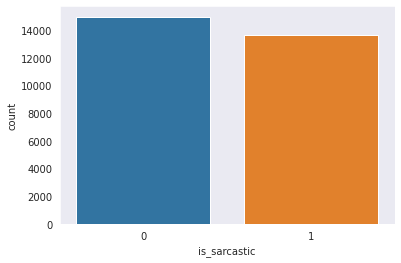

In [10]:
sns.set_style("dark")
sns.countplot(tweet_final_df.is_sarcastic)

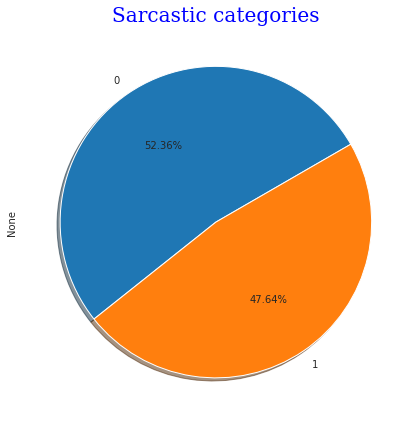

In [11]:
tweet_final_df.groupby('is_sarcastic').size().plot(kind='pie', subplots=True, shadow=True, startangle=30, figsize=(8,6), autopct='%1.2f%%')
font1 = {'family':'serif','color':'blue','size':20}
plt.title("Sarcastic categories", fontdict = font1)    
                
plt.tight_layout()
plt.show()


In [ ]:
tweet_final_df.describe()

,is_sarcastic
count,28619.000000
mean,0.476397
std,0.499451
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


###3. Get length of each sentence

In [ ]:
def max_len(input):

  max_length = 0
  max_word_idx = 0
  max_len_count = []
  max_word_count = []

  for i in range(28619-1):
    length = len(input[i])
    max_idx = np.max(length)
    #print(max_idx)
    if (length > max_length):
      max_length = length
      max_len_count.append(max_length)
      print("max_length so far",max_length)
          
  return(max_length, max_len_count)       

In [ ]:
max_len(tweet_final_df["headline"])

max_length so far 61
max_length so far 79
max_length so far 88
max_length so far 107
max_length so far 119
max_length so far 124
max_length so far 136
max_length so far 145
max_length so far 254
max_length so far 926


(926, [61, 79, 88, 107, 119, 124, 136, 145, 254, 926])

In [ ]:
tweet_final_df["len_headlines"] = tweet_final_df["headline"].str.len()

In [ ]:
tweet_final_df

,is_sarcastic,headline,len_headlines
0,1,thirtysomething scientists unveil doomsday clo...,61
1,0,dem rep. totally nails why congress is falling...,79
2,0,eat your veggies: 9 deliciously different recipes,49
3,1,inclement weather prevents liar from getting t...,52
4,1,mother comes pretty close to using word 'strea...,61
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,44
28615,1,internal affairs investigator disappointed con...,87
28616,0,the most beautiful acceptance speech this week...,71
28617,1,mars probe destroyed by orbiting spielberg-gat...,61


###4. Define parameters 

- max_features: Number of words to take from tokenizer
- maxlen: Maximum length of each sentence
- embedding_size: Size of embedding vector

We will need these very important parameters

- max_features - MAX_NB_WORDS.... will be the maximum number of word index count (Unique tokens)
- maxlen - MAX_SEQUENCE_LENGTH .... this will be our defined max length of word sentence, this will be used later for pre-padding or post-padding
- embedding_size - EMBEDDING_DIM .... this is to convert the huge word index embeddings to a more denser embeddings.

###5. Get indices for words

In [12]:
import re

tweet_final_df['headline_trim'] = tweet_final_df['headline'].apply(lambda x: x.lower())
tweet_final_df['headline_trim'] = tweet_final_df['headline_trim'].str.strip()
tweet_final_df['headline_trim'] = tweet_final_df['headline_trim'].apply((lambda x: re.sub('[0-9]','',x)))
tweet_final_df['headline_trim'] = tweet_final_df['headline_trim'].apply((lambda x: re.sub('[^a-zA-Z\s]','',x)))


In [13]:
tweet_final_df

,is_sarcastic,headline,headline_trim
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,dem rep totally nails why congress is falling ...
2,0,eat your veggies: 9 deliciously different recipes,eat your veggies deliciously different recipes
3,1,inclement weather prevents liar from getting t...,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...,mother comes pretty close to using word stream...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,jews to celebrate rosh hashasha or something
28615,1,internal affairs investigator disappointed con...,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...,the most beautiful acceptance speech this week...
28617,1,mars probe destroyed by orbiting spielberg-gat...,mars probe destroyed by orbiting spielberggate...


In [14]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 40000

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(tweet_final_df['headline_trim'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 28811 unique tokens.


In [15]:
word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'by': 18,
 'after': 19,
 'this': 20,
 'be': 21,
 'out': 22,
 'that': 23,
 'as': 24,
 'it': 25,
 'how': 26,
 'up': 27,
 'not': 28,
 'he': 29,
 'his': 30,
 'are': 31,
 'just': 32,
 'what': 33,
 'your': 34,
 'who': 35,
 'has': 36,
 'all': 37,
 'will': 38,
 'report': 39,
 'us': 40,
 'more': 41,
 'into': 42,
 'one': 43,
 'have': 44,
 'over': 45,
 'why': 46,
 'woman': 47,
 'area': 48,
 'day': 49,
 'can': 50,
 'says': 51,
 'donald': 52,
 'time': 53,
 'no': 54,
 'its': 55,
 'like': 56,
 'first': 57,
 'get': 58,
 'her': 59,
 'trumps': 60,
 'people': 61,
 'now': 62,
 'house': 63,
 'an': 64,
 'i': 65,
 'off': 66,
 'life': 67,
 'still': 68,
 'white': 69,
 'obama': 70,
 'make': 71,
 'was': 72,
 'back': 73,
 'than': 74,
 'if': 75,
 'women': 76,
 'down': 77,
 'my': 78,
 'when': 79,
 'we': 80,
 'clinton': 81,
 

In [16]:
tweet_final_df["headline_tokenized_words"] = tokenizer.texts_to_sequences(tweet_final_df['headline_trim'].values)


In [17]:
tweet_final_df

,is_sarcastic,headline,headline_trim,headline_tokenized_words
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...,"[15240, 331, 3064, 6216, 2290, 2, 660, 1120]"
1,0,dem rep. totally nails why congress is falling...,dem rep totally nails why congress is falling ...,"[7226, 1706, 718, 3065, 46, 223, 10, 1857, 104..."
2,0,eat your veggies: 9 deliciously different recipes,eat your veggies deliciously different recipes,"[877, 34, 11006, 15241, 597, 1426]"
3,1,inclement weather prevents liar from getting t...,inclement weather prevents liar from getting t...,"[11007, 1575, 6217, 4439, 14, 138, 1, 143]"
4,1,mother comes pretty close to using word 'strea...,mother comes pretty close to using word stream...,"[434, 460, 280, 980, 1, 549, 598, 4054, 6218]"
...,...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,jews to celebrate rosh hashasha or something,"[3612, 1, 930, 28808, 28809, 131, 329]"
28615,1,internal affairs investigator disappointed con...,internal affairs investigator disappointed con...,"[5801, 6737, 5379, 1411, 2054, 154, 176, 37, 3..."
28616,0,the most beautiful acceptance speech this week...,the most beautiful acceptance speech this week...,"[3, 96, 581, 3148, 309, 20, 204, 1096, 14, 6, ..."
28617,1,mars probe destroyed by orbiting spielberg-gat...,mars probe destroyed by orbiting spielberggate...,"[1803, 1263, 3215, 18, 28810, 28811, 834, 6093]"


In [18]:
tweet_final_df["len_tokenize"] = tweet_final_df["headline_tokenized_words"].str.len()

In [19]:
tweet_final_df

,is_sarcastic,headline,headline_trim,headline_tokenized_words,len_tokenize
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...,"[15240, 331, 3064, 6216, 2290, 2, 660, 1120]",8
1,0,dem rep. totally nails why congress is falling...,dem rep totally nails why congress is falling ...,"[7226, 1706, 718, 3065, 46, 223, 10, 1857, 104...",13
2,0,eat your veggies: 9 deliciously different recipes,eat your veggies deliciously different recipes,"[877, 34, 11006, 15241, 597, 1426]",6
3,1,inclement weather prevents liar from getting t...,inclement weather prevents liar from getting t...,"[11007, 1575, 6217, 4439, 14, 138, 1, 143]",8
4,1,mother comes pretty close to using word 'strea...,mother comes pretty close to using word stream...,"[434, 460, 280, 980, 1, 549, 598, 4054, 6218]",9
...,...,...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,jews to celebrate rosh hashasha or something,"[3612, 1, 930, 28808, 28809, 131, 329]",7
28615,1,internal affairs investigator disappointed con...,internal affairs investigator disappointed con...,"[5801, 6737, 5379, 1411, 2054, 154, 176, 37, 3...",13
28616,0,the most beautiful acceptance speech this week...,the most beautiful acceptance speech this week...,"[3, 96, 581, 3148, 309, 20, 204, 1096, 14, 6, ...",12
28617,1,mars probe destroyed by orbiting spielberg-gat...,mars probe destroyed by orbiting spielberggate...,"[1803, 1263, 3215, 18, 28810, 28811, 834, 6093]",8


In [20]:
def max2_len(input):

  max_length = 0
  max_word_idx = 0
  max_len_count = []
  max_word_count = []

  for i in range(28619-1):
    length = len(input[i])
    max_idx = max(input[i])
    if (length > max_length):
      max_length = length
      max_len_count.append(max_length)
      print("max_length so far",max_length)
    if (max_idx > max_word_idx):
      max_word_idx = max_idx
      max_word_count.append(max_word_idx)
      print("max word index so far",max_word_idx)
      
  return(max_length, max_word_idx, max_len_count, max_word_count)      

In [21]:
headline_max_len, headline_max_word, headline_max_len_knt, headline_max_word_knt = max2_len(tweet_final_df["headline_tokenized_words"])

Streaming output truncated to the last 5000 lines.
max word index so far 22347
max word index so far 22348
max word index so far 22350
max word index so far 22351
max word index so far 22352
max word index so far 22353
max word index so far 22354
max word index so far 22355
max word index so far 22356
max word index so far 22357
max word index so far 22360
max word index so far 22363
max word index so far 22364
max word index so far 22365
max word index so far 22368
max word index so far 22371
max word index so far 22372
max word index so far 22373
max word index so far 22374
max word index so far 22375
max word index so far 22376
max word index so far 22377
max word index so far 22378
max word index so far 22379
max word index so far 22380
max word index so far 22382
max word index so far 22383
max word index so far 22384
max word index so far 22385
max word index so far 22387
max word index so far 22389
max word index so far 22390
max word index so far 22391
max word index so far 223

In [22]:
print(headline_max_len)
print(headline_max_word) 
print(headline_max_len_knt)
print(headline_max_word_knt)

151
28811
[8, 13, 14, 16, 18, 19, 20, 21, 23, 24, 28, 151]
[15240, 15241, 15242, 15243, 15244, 15245, 15246, 15247, 15248, 15249, 15250, 15251, 15253, 15254, 15255, 15256, 15258, 15259, 15261, 15263, 15264, 15265, 15266, 15268, 15270, 15271, 15272, 15274, 15275, 15276, 15277, 15279, 15280, 15282, 15283, 15285, 15286, 15287, 15289, 15290, 15291, 15293, 15294, 15295, 15297, 15300, 15301, 15302, 15303, 15305, 15306, 15308, 15309, 15310, 15311, 15312, 15313, 15316, 15317, 15318, 15319, 15320, 15322, 15324, 15326, 15328, 15330, 15332, 15333, 15334, 15335, 15336, 15338, 15339, 15340, 15341, 15342, 15343, 15344, 15345, 15346, 15347, 15348, 15349, 15350, 15352, 15353, 15354, 15355, 15356, 15357, 15358, 15359, 15360, 15361, 15362, 15363, 15364, 15366, 15367, 15368, 15369, 15370, 15371, 15372, 15373, 15374, 15375, 15376, 15377, 15379, 15380, 15381, 15382, 15384, 15386, 15387, 15389, 15390, 15391, 15393, 15396, 15399, 15400, 15401, 15402, 15404, 15405, 15407, 15408, 15409, 15411, 15412, 15415, 15

In [23]:
def tot2_count(arr):

  knt_10 = 0
  knt_20 = 0
  knt_30 = 0
  knt_40 = 0
  knt_50 = 0
  knt_100 = 0
  knt_160 = 0
  
  for i in range(0,len(arr)):
    length = len(arr[i])
    #print("length",length)
    if (length >= 0 ) and (length <= 10):
      knt_10 = knt_10 + 1
    elif (length >= 11 ) and (length <= 20):
      knt_20 = knt_20 + 1
    elif (length >= 21 ) and (length <= 30):
      knt_30 = knt_30 + 1
    elif (length >= 31 ) and (length <= 40):
      knt_40 = knt_40 + 1
    elif (length >= 41 ) and (length <= 50):
      knt_50 = knt_50 + 1
    elif (length >= 51 ) and (length <= 100):
      knt_100 = knt_100 + 1
    elif (length >= 101 ) and (length <= 160):
      knt_160 = knt_160 + 1
    
  return(knt_10, knt_20, knt_30, knt_40, knt_50, knt_100, knt_160)  


In [24]:
hd_10, hd_20, hd_30, hd_40, hd_50, hd_100, hd_160 = tot2_count(tweet_final_df["headline_tokenized_words"])

In [25]:
print(hd_10)
print(hd_20)
print(hd_30)
print(hd_40)
print(hd_50)
print(hd_100)
print(hd_160)

16847
11683
86
2
0
0
1


The max length of words in headline_tokenized_words is 151 and max word index is 28811

Most of the headline tweets are smaller ones with word length between 0 & 10 (16847), next frequency is between 11 - 20 (11683), next frequency is between 21 - 30 (86) and there are only 2 words between 40 -50 and finally only one word with 151 length.  

So we can use 30 as the maxlen in the padding_sequence() and since the max word index is 28811, i am choosing 30000 as the value for padding

###6. Create features and labels

In [26]:
MAX_SEQUENCE_LENGTH = 30
MAX_PADDING = 0

BX = pad_sequences(tweet_final_df["headline_tokenized_words"], maxlen=MAX_SEQUENCE_LENGTH, padding='pre', truncating='pre', value=MAX_PADDING)

By = tweet_final_df["is_sarcastic"]

In [27]:
BX

array([[    0,     0,     0, ...,     2,   660,  1120],
       [    0,     0,     0, ...,  1636,  2073,  1707],
       [    0,     0,     0, ..., 15241,   597,  1426],
       ...,
       [    0,     0,     0, ...,     6,   730,  1856],
       [    0,     0,     0, ..., 28811,   834,  6093],
       [    0,     0,     0, ...,     6,   262,   170]], dtype=int32)

In [28]:
By

0        1
1        0
2        0
3        1
4        1
        ..
28614    1
28615    1
28616    0
28617    1
28618    1
Name: is_sarcastic, Length: 28619, dtype: int64

In [29]:
BX.shape

(28619, 30)

In [30]:
By.shape

(28619,)

###7. Get vocabulary size

In [31]:
print("Vocabulary size (number of Unique words in the tweets)",len(set(word_index)))

Vocabulary size (number of Unique words in the tweets) 28811


###8. Create a weight matrix using GloVe embeddings

In [ ]:
from zipfile import ZipFile

with ZipFile(glove_path+'glove.6B.zip', 'r') as z:
  z.extractall(glove_path)

In [ ]:
os.chdir(glove_path)
!ls

 glove.6B.100d.txt   LSTM_model_1.pkl
 glove.6B.200d.txt   LSTM_model_2.pkl
 glove.6B.300d.txt  'Ramesh Gopinath NLP2 Sequential AIML Project.ipynb'
 glove.6B.50d.txt    Sarcasm_Headlines_Dataset.json
 glove.6B.zip


In [32]:
embeddings_dict = {}
with open(glove_path+'glove.6B.50d.txt', 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector
    f.close()    

In [33]:
len(embeddings_dict)

400000

In [34]:
embeddings_dict

{'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
       dtype=float32),
 ',': array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
        -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
        -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
        -0.4

In [35]:
embeddings_dict["problems"]

array([ 1.0223e+00,  1.0931e-01,  2.3450e-02,  2.0280e-01, -8.4025e-01,
        9.9172e-01, -4.6859e-02,  1.2298e-01,  2.9216e-01, -4.4474e-01,
        2.1638e-01,  4.0109e-01, -1.2058e+00, -3.6189e-01,  7.3603e-01,
        4.6581e-01, -3.7633e-01, -1.5207e-01,  6.8421e-01, -7.2640e-01,
       -3.9255e-01,  5.3339e-02, -7.7758e-02, -1.7231e-01,  5.9890e-01,
       -1.5130e+00, -6.0468e-02, -1.3940e-04,  5.1362e-01,  7.2980e-01,
        3.5944e+00,  6.9276e-01,  4.9870e-01, -1.2985e+00, -8.2193e-02,
        5.9690e-01, -3.1554e-01,  2.0036e-01,  7.1518e-01,  2.9870e-01,
       -8.2342e-01,  1.3102e-01,  2.0069e-01,  8.1894e-01,  4.3841e-01,
        3.9971e-01,  2.5966e-01,  9.0112e-01,  1.9557e-01, -1.3727e-01],
      dtype=float32)

In [36]:
embeddings_dict["problems"].shape[0]   

50

In [37]:
MAX_EB_WORDS = len(word_index)+1

In [38]:
embedding_dim = 50
embedding_matrix = np.zeros((MAX_EB_WORDS, embedding_dim))
for word, i in word_index.items():
    if i < MAX_EB_WORDS:
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [39]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.68046999, -0.039263  ,  0.30186   , ..., -0.073297  ,
        -0.064699  , -0.26043999],
       [ 0.70853001,  0.57088   , -0.4716    , ..., -0.22562   ,
        -0.093918  , -0.80374998],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.54430008,  1.40219998,  1.89680004, ..., -0.20452   ,
        -0.66579998, -0.64872003],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [40]:
embedding_matrix.shape

(28812, 50)

###9. Define and compile a Bidirectional LSTM model

In [41]:
from sklearn.model_selection import train_test_split

BX_train, BX_test, By_train, By_test = train_test_split(BX, By, test_size=0.20, random_state=42) # 80% training and 20% testing

print('BX train: {}'.format(BX_train.shape))
print('By train: {}'.format(By_train.shape))
print('BX test: {}'.format(BX_test.shape))
print('By test: {}'.format(By_test.shape))

BX train: (22895, 30)
By train: (22895,)
BX test: (5724, 30)
By test: (5724,)


In [42]:
BX.shape[1]

30

In [43]:
MAX_EB_WORDS = len(word_index)+1
EMBEDDING_DIM = 50


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, SpatialDropout1D

model_B1 = Sequential()
model_B1.add(Embedding(MAX_EB_WORDS, EMBEDDING_DIM, weights=[embedding_matrix], input_length=BX.shape[1], trainable=True))
model_B1.add(LSTM(100))

model_B1.add(Dense(1, activation='sigmoid'))

print(model_B1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 50)            1440600   
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,501,101
Trainable params: 1,501,101
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
adam_B1 = keras.optimizers.Adam(learning_rate = 0.0001)
model_B1.compile(loss='binary_crossentropy', optimizer=adam_B1, metrics=['accuracy'])

###10. Fit the model and check the validation accuracy

In [46]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

epochs = 15
batch_size = 150

history_B1 = model_B1.fit(BX_train, By_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=2, min_delta=0.0001)])

Epoch 1/15
138/138 [==============================] - 17s 104ms/step - loss: 0.6658 - accuracy: 0.6010 - val_loss: 0.6312 - val_accuracy: 0.6725
Epoch 2/15
138/138 [==============================] - 14s 99ms/step - loss: 0.5931 - accuracy: 0.6906 - val_loss: 0.5517 - val_accuracy: 0.7240
Epoch 3/15
138/138 [==============================] - 14s 99ms/step - loss: 0.5241 - accuracy: 0.7420 - val_loss: 0.5083 - val_accuracy: 0.7638
Epoch 4/15
138/138 [==============================] - 14s 100ms/step - loss: 0.4779 - accuracy: 0.7777 - val_loss: 0.4728 - val_accuracy: 0.7913
Epoch 5/15
138/138 [==============================] - 15s 112ms/step - loss: 0.4428 - accuracy: 0.7970 - val_loss: 0.4480 - val_accuracy: 0.8039
Epoch 6/15
138/138 [==============================] - 15s 110ms/step - loss: 0.4120 - accuracy: 0.8157 - val_loss: 0.4317 - val_accuracy: 0.8022
Epoch 7/15
138/138 [==============================] - 14s 100ms/step - loss: 0.3865 - accuracy: 0.8295 - val_loss: 0.4129 - val_accu

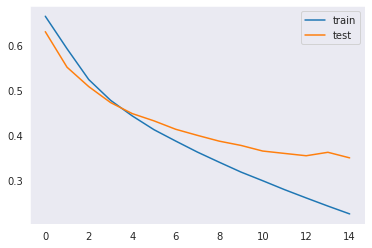

In [47]:
plt.figure(figsize=(6,4))
plt.plot(history_B1.history['loss'], label='train')
plt.plot(history_B1.history['val_loss'], label='test')
plt.legend()
plt.show()

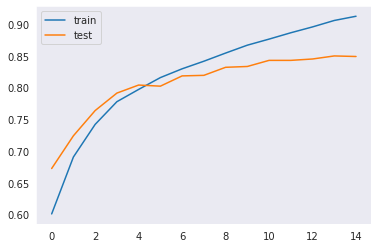

In [48]:
plt.figure(figsize=(6,4))
plt.plot(history_B1.history['accuracy'], label='train')
plt.plot(history_B1.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [49]:
model_B1.evaluate(BX_test,By_test)

179/179 [==============================] - 2s 9ms/step - loss: 0.3368 - accuracy: 0.8574


[0.3368026912212372, 0.857442319393158]

Predicting X_test and checking against the actuals after single LSTM model

In [50]:
y_pred_B1 = model_B1.predict(BX_test)

In [51]:
print(BX_test.shape)
print(By_test.shape)

(5724, 30)
(5724,)


In [52]:
By_test.value_counts()

0    2995
1    2729
Name: is_sarcastic, dtype: int64

In [53]:
BX_test[0:10]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,   357,  2994,     1,  1092,    77,  2662,
          402,   522,  2596],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,  1726,  1327,  2624,   483,     7,  1065,
            2,    69,    63],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,    39,   569,     2, 15283,     2,    61,   138,
          456,    73,     7,  1235, 11038,  1341,    19,   621,     1,
         5494,  1234,  3269],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,  3145,  2131,  4568,  2706,     9,
         1345,  4569,  2614],
       [    0,     0,     0,

In [54]:
By_test[0:30]

27927    0
1660     1
96       1
6237     1
6650     0
27135    0
2718     0
19300    1
13658    1
12840    1
843      0
22778    0
7613     1
24221    0
7672     0
20517    1
2974     0
14361    0
21270    0
25848    0
23948    1
1512     0
6267     0
9767     1
27382    0
13987    1
7908     1
7317     0
3673     0
23391    0
Name: is_sarcastic, dtype: int64

In [55]:
BX_test[1660]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,  590,   13,
        144, 1059,    9,  176, 2233,    1, 1942, 1578], dtype=int32)

In [56]:
BX_test[2718]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,    20,   204, 22588,  4531,
           8,  1343,  6213], dtype=int32)

In [57]:
print("Single LSTM Prediction")

for i in (96,843,1512,1660,2718):
  
  print("test sample...:",i)
  print("")
  #print("   ................  BX_test",BX_test[i])
  print("   ................  By_test",By_test[i])
  print("   Single LSTM .. y_pred_B1",y_pred_B1[i])
  print("")

Single LSTM Prediction
test sample...: 96

   ................  By_test 1
   Single LSTM .. y_pred_B1 [0.9991818]

test sample...: 843

   ................  By_test 0
   Single LSTM .. y_pred_B1 [0.00881284]

test sample...: 1512

   ................  By_test 0
   Single LSTM .. y_pred_B1 [0.04393768]

test sample...: 1660

   ................  By_test 1
   Single LSTM .. y_pred_B1 [0.4089079]

test sample...: 2718

   ................  By_test 0
   Single LSTM .. y_pred_B1 [0.07661378]



In [58]:
MAX_EB_WORDS = len(word_index)+1
EMBEDDING_DIM = 50


In [59]:
from tensorflow.keras import layers

inputs_B2 = keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(MAX_EB_WORDS, EMBEDDING_DIM, weights=[embedding_matrix], input_length=BX.shape[1], trainable=True)(inputs_B2)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(128,return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs_B2 = layers.Dense(1, activation="sigmoid")(x)
model_B2 = keras.Model(inputs_B2, outputs_B2)

model_B2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 50)          1440600   
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        183296    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,788,377
Trainable params: 1,788,377
Non-train

In [60]:
adam_B2 = keras.optimizers.Adam(learning_rate = 0.0001)
model_B2.compile(loss='binary_crossentropy', optimizer=adam_B2, metrics=['accuracy'])

In [61]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

epochs = 15
batch_size = 150

history_B2 = model_B2.fit(BX_train, By_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=2, min_delta=0.0001)])

Epoch 1/15
138/138 [==============================] - 61s 390ms/step - loss: 0.6424 - accuracy: 0.6292 - val_loss: 0.5678 - val_accuracy: 0.7183
Epoch 2/15
138/138 [==============================] - 54s 392ms/step - loss: 0.5438 - accuracy: 0.7264 - val_loss: 0.5132 - val_accuracy: 0.7576
Epoch 3/15
138/138 [==============================] - 52s 376ms/step - loss: 0.4938 - accuracy: 0.7645 - val_loss: 0.4754 - val_accuracy: 0.7786
Epoch 4/15
138/138 [==============================] - 52s 376ms/step - loss: 0.4466 - accuracy: 0.7935 - val_loss: 0.4384 - val_accuracy: 0.7978
Epoch 5/15
138/138 [==============================] - 52s 377ms/step - loss: 0.3901 - accuracy: 0.8255 - val_loss: 0.4021 - val_accuracy: 0.8188
Epoch 6/15
138/138 [==============================] - 52s 378ms/step - loss: 0.3315 - accuracy: 0.8599 - val_loss: 0.3830 - val_accuracy: 0.8371
Epoch 7/15
138/138 [==============================] - 52s 377ms/step - loss: 0.2845 - accuracy: 0.8797 - val_loss: 0.3431 - val_ac

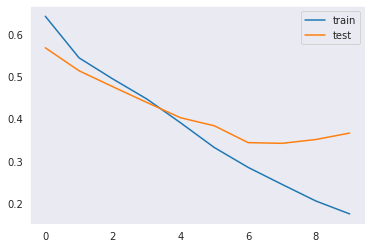

In [62]:
plt.figure(figsize=(6,4))
plt.plot(history_B2.history['loss'], label='train')
plt.plot(history_B2.history['val_loss'], label='test')
plt.legend()
plt.show()

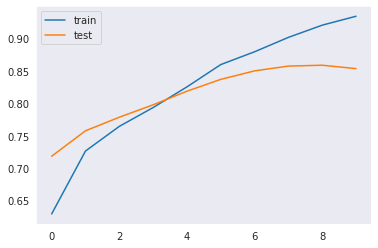

In [63]:
plt.figure(figsize=(6,4))
plt.plot(history_B2.history['accuracy'], label='train')
plt.plot(history_B2.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [64]:
model_B2.evaluate(BX_test,By_test)

179/179 [==============================] - 5s 27ms/step - loss: 0.3341 - accuracy: 0.8657


[0.3341016173362732, 0.865653395652771]

In [65]:
y_pred_B2 = model_B2.predict(BX_test)

In [66]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, SpatialDropout1D

inputs_B2 = keras.Input(shape=(None,), dtype="int32")
x3 = layers.Embedding(MAX_EB_WORDS, EMBEDDING_DIM, weights=[embedding_matrix], input_length=BX.shape[1], trainable=True)(inputs_B2)
# Add 2 bidirectional LSTMs & a dropout
x3 = layers.Bidirectional(layers.LSTM(200,return_sequences=True))(x3)
#x3 = layers.Dropout(0.2)(x3)
x3 = layers.Bidirectional(layers.LSTM(100))(x3)
# Add a classifier
outputs_B2 = layers.Dense(1, activation="sigmoid")(x3)
model_B3 = keras.Model(inputs_B2, outputs_B2)
model_B3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_2 (Embedding)     (None, None, 50)          1440600   
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 400)        401600    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              400800    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 2,243,201
Trainable params: 2,243,201
Non-tra

In [67]:
adam_lr = keras.optimizers.Adam(learning_rate = 0.0001)
model_B3.compile(loss='binary_crossentropy', optimizer=adam_lr, metrics=['accuracy'])

In [68]:
epochs = 15
batch_size = 150

history_B3 = model_B3.fit(BX_train, By_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=2, min_delta=0.0001)])

Epoch 1/15
138/138 [==============================] - 100s 671ms/step - loss: 0.6288 - accuracy: 0.6465 - val_loss: 0.5573 - val_accuracy: 0.7284
Epoch 2/15
138/138 [==============================] - 91s 658ms/step - loss: 0.5346 - accuracy: 0.7322 - val_loss: 0.5093 - val_accuracy: 0.7620
Epoch 3/15
138/138 [==============================] - 90s 656ms/step - loss: 0.4854 - accuracy: 0.7670 - val_loss: 0.4712 - val_accuracy: 0.7860
Epoch 4/15
138/138 [==============================] - 91s 661ms/step - loss: 0.4433 - accuracy: 0.7957 - val_loss: 0.4504 - val_accuracy: 0.7930
Epoch 5/15
138/138 [==============================] - 91s 658ms/step - loss: 0.3941 - accuracy: 0.8244 - val_loss: 0.4120 - val_accuracy: 0.8109
Epoch 6/15
138/138 [==============================] - 91s 657ms/step - loss: 0.3431 - accuracy: 0.8506 - val_loss: 0.4102 - val_accuracy: 0.8157
Epoch 7/15
138/138 [==============================] - 91s 662ms/step - loss: 0.2952 - accuracy: 0.8775 - val_loss: 0.3508 - val_a

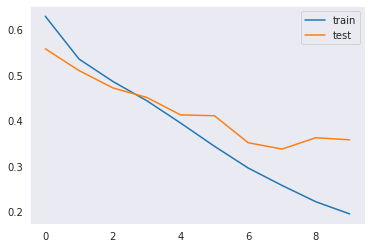

In [69]:
plt.figure(figsize=(6,4))
plt.plot(history_B3.history['loss'], label='train')
plt.plot(history_B3.history['val_loss'], label='test')
plt.legend()
plt.show()

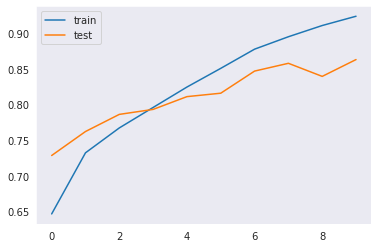

In [70]:
plt.figure(figsize=(6,4))
plt.plot(history_B3.history['accuracy'], label='train')
plt.plot(history_B3.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [71]:
y_pred_B3 = model_B3.predict(BX_test)

In [73]:
print("Bi-Directional LSTM Prediction")

for i in (96,843,1512,1660,2718):
  
  print("test sample...:",i)
  print("")
  #print("   ..............   BX_test",BX_test[i])
  print("   ..............   By_test :",By_test[i])
  print("   Single LSTM ........  y_pred_B1 :",y_pred_B1[i])
  print("   Bi-directional LSTM   y_pred_B2 :",y_pred_B2[i])
  print("   Bi-directional LSTM   y_pred_B3 :",y_pred_B3[i])
  print("")

Bi-Directional LSTM Prediction
test sample...: 96

   ..............   By_test : 1
   Single LSTM ........  y_pred_B1 : [0.9991818]
   Bi-directional LSTM   y_pred_B2 : [0.9987576]
   Bi-directional LSTM   y_pred_B3 : [0.99804443]

test sample...: 843

   ..............   By_test : 0
   Single LSTM ........  y_pred_B1 : [0.00881284]
   Bi-directional LSTM   y_pred_B2 : [0.01595154]
   Bi-directional LSTM   y_pred_B3 : [0.00872228]

test sample...: 1512

   ..............   By_test : 0
   Single LSTM ........  y_pred_B1 : [0.04393768]
   Bi-directional LSTM   y_pred_B2 : [0.00438818]
   Bi-directional LSTM   y_pred_B3 : [0.00366303]

test sample...: 1660

   ..............   By_test : 1
   Single LSTM ........  y_pred_B1 : [0.4089079]
   Bi-directional LSTM   y_pred_B2 : [0.48023564]
   Bi-directional LSTM   y_pred_B3 : [0.1964437]

test sample...: 2718

   ..............   By_test : 0
   Single LSTM ........  y_pred_B1 : [0.07661378]
   Bi-directional LSTM   y_pred_B2 : [0.00887197]
  

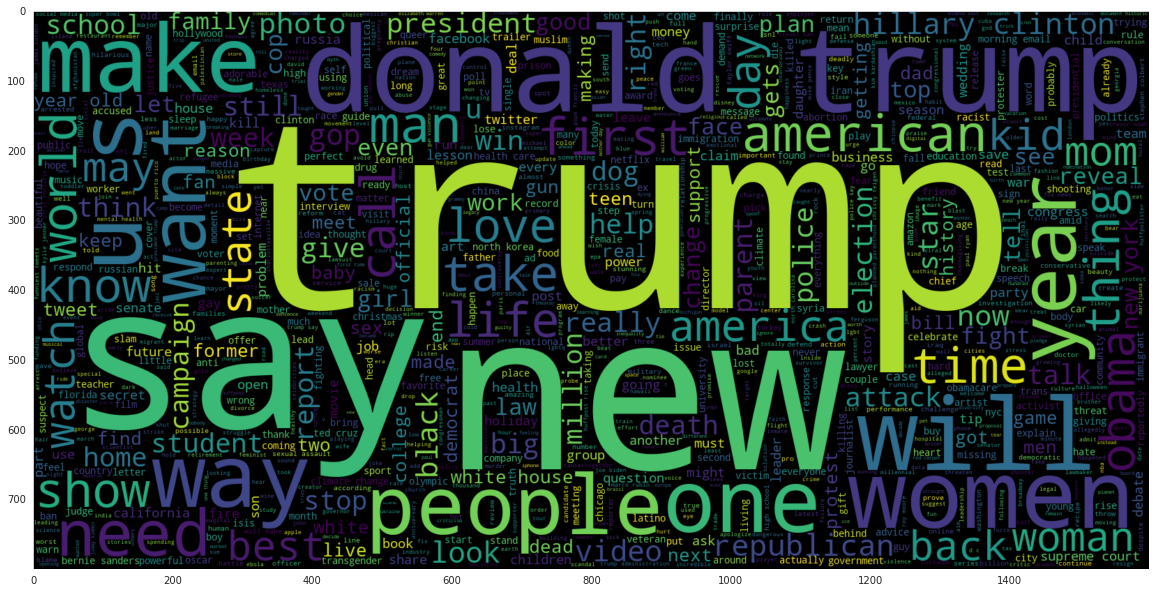

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(tweet_final_df[tweet_final_df.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')

Top 1000 words in Non-sarcastic tweets

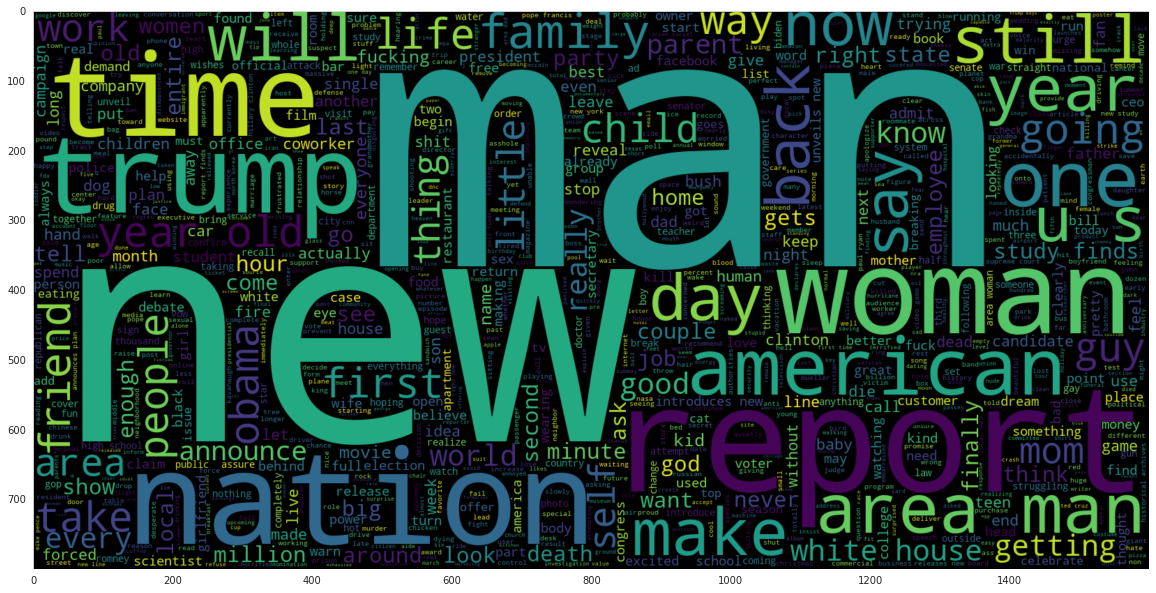

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(tweet_final_df[tweet_final_df.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

Top 1000 words in Sarcastic tweets